### Análisis de imágenes (30%)

#### 1. Mejorar el modelo que hemos creado en clase de clasificación de imagen del dataset Fashion Mnist.

- Superar el 0.90 de precisión en el entrenamiento y el 0.88 en el test supone 1 punto.


#### 2. Mejorar el modelo que hemos creado en clase de clasificación de imagen del dataset CIFAR-10.
- Superar el 0.90 de precisión en el entrenamiento y el 0.74 en el test supone 1 punto.
- El punto restante se obtiene según los resultados obtenidos en estricto orden, tal y como se haría en una competición de Kaggle. El mejor modelo es 1 punto y el resto de alumnos tendrán una nota acorde al cuartil que consigan con respecto al primero.

# NN FASHION MNIST

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
ind = 0
print(training_labels[ind])

9


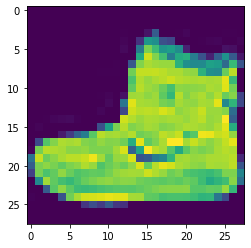

In [11]:
plt.imshow(training_images[ind])

In [12]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [37]:
model_nn = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [38]:
model_nn.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [39]:
model_nn.fit(training_images, training_labels, epochs=100)
model_nn.summary()

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6061 - accuracy: 0.7852
Epoch 2/100
1875/1875 [==============================] - 2s 893us/step - loss: 0.3724 - accuracy: 0.8642
Epoch 3/100
1875/1875 [==============================] - 2s 909us/step - loss: 0.3312 - accuracy: 0.8782
Epoch 4/100
1875/1875 [==============================] - 2s 913us/step - loss: 0.3043 - accuracy: 0.8872
Epoch 5/100
1875/1875 [==============================] - 2s 907us/step - loss: 0.2872 - accuracy: 0.8947
Epoch 6/100
1875/1875 [==============================] - 2s 902us/step - loss: 0.2674 - accuracy: 0.9010
Epoch 7/100
1875/1875 [==============================] - 2s 897us/step - loss: 0.2549 - accuracy: 0.9033
Epoch 8/100
1875/1875 [==============================] - 2s 911us/step - loss: 0.2413 - accuracy: 0.9090
Epoch 9/100
1875/1875 [==============================] - 2s 911us/step - loss: 0.2333 - accuracy: 0.9112
Epoch 10/100
1875/1875 [==============================] -

1875/1875 [==============================] - 2s 905us/step - loss: 0.0532 - accuracy: 0.9808
Epoch 79/100
1875/1875 [==============================] - 2s 904us/step - loss: 0.0469 - accuracy: 0.9824
Epoch 80/100
1875/1875 [==============================] - 2s 904us/step - loss: 0.0543 - accuracy: 0.9795
Epoch 81/100
1875/1875 [==============================] - 2s 901us/step - loss: 0.0524 - accuracy: 0.9813
Epoch 82/100
1875/1875 [==============================] - 2s 905us/step - loss: 0.0476 - accuracy: 0.9820
Epoch 83/100
1875/1875 [==============================] - 2s 905us/step - loss: 0.0519 - accuracy: 0.9807
Epoch 84/100
1875/1875 [==============================] - 2s 902us/step - loss: 0.0482 - accuracy: 0.9819
Epoch 85/100
1875/1875 [==============================] - 2s 910us/step - loss: 0.0588 - accuracy: 0.9790
Epoch 86/100
1875/1875 [==============================] - 2s 930us/step - loss: 0.0463 - accuracy: 0.9828
Epoch 87/100
1875/1875 [==============================] - 2

In [40]:
train_loss, train_accuracy = model_nn.evaluate(training_images, training_labels, verbose = False)
print("Train Accuracy: {:.4f}".format(train_accuracy))

test_loss, test_accuracy = model_nn.evaluate(test_images, test_labels, verbose = False)
print("Test Accuracy:  {:.4f}".format(test_accuracy))


Train Accuracy: 0.9866
Test Accuracy:  0.8930


# CNN CIFAR10

In [32]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [33]:
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

In [34]:
# Cargar el dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# (X_train, y_train), (X_test, y_test) = mnist.load_data()


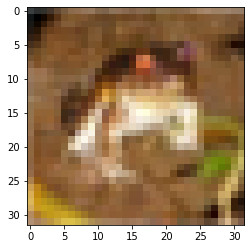

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
ind = 0
plt.imshow(X_train[ind])

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
 
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
 
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(10,activation='softmax'))


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test)

classifications = model.predict(X_test)

print(classifications[0])
print(y_test[0])

Epoch 1/150
1563/1563 [==============================] - 166s 106ms/step - loss: 2.0002 - accuracy: 0.3833 - val_loss: 1.4707 - val_accuracy: 0.5410
Epoch 2/150
1563/1563 [==============================] - 161s 103ms/step - loss: 1.1881 - accuracy: 0.5931 - val_loss: 1.1197 - val_accuracy: 0.6256
Epoch 3/150
1563/1563 [==============================] - 160s 102ms/step - loss: 1.0165 - accuracy: 0.6472 - val_loss: 0.9262 - val_accuracy: 0.6748
Epoch 4/150
1563/1563 [==============================] - 159s 102ms/step - loss: 0.9396 - accuracy: 0.6758 - val_loss: 1.1377 - val_accuracy: 0.6196
Epoch 5/150
1563/1563 [==============================] - 160s 103ms/step - loss: 0.8867 - accuracy: 0.6918 - val_loss: 0.8255 - val_accuracy: 0.7141
Epoch 6/150
1563/1563 [==============================] - 165s 105ms/step - loss: 0.8485 - accuracy: 0.7043 - val_loss: 0.8397 - val_accuracy: 0.7122
Epoch 7/150
1563/1563 [==============================] - 158s 101ms/step - loss: 0.8256 - accuracy: 0.7178

Epoch 56/150
1563/1563 [==============================] - 157s 100ms/step - loss: 0.4474 - accuracy: 0.8398 - val_loss: 0.6118 - val_accuracy: 0.8022
Epoch 57/150
1563/1563 [==============================] - 157s 100ms/step - loss: 0.4428 - accuracy: 0.8430 - val_loss: 0.6281 - val_accuracy: 0.7957
Epoch 58/150
1563/1563 [==============================] - 157s 100ms/step - loss: 0.4396 - accuracy: 0.8453 - val_loss: 0.6010 - val_accuracy: 0.7998
Epoch 59/150
1563/1563 [==============================] - 157s 100ms/step - loss: 0.4506 - accuracy: 0.8422 - val_loss: 0.6362 - val_accuracy: 0.7916
Epoch 60/150
1563/1563 [==============================] - 157s 100ms/step - loss: 0.4404 - accuracy: 0.8436 - val_loss: 0.6101 - val_accuracy: 0.7975
Epoch 61/150
1563/1563 [==============================] - 157s 100ms/step - loss: 0.4455 - accuracy: 0.8413 - val_loss: 0.6218 - val_accuracy: 0.7937
Epoch 62/150
1563/1563 [==============================] - 157s 100ms/step - loss: 0.4377 - accuracy:

In [36]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose = False)
print("Train Accuracy: {:.4f}".format(train_accuracy))

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = False)
print("Test Accuracy:  {:.4f}".format(test_accuracy))


Train Accuracy: 0.9708
Test Accuracy:  0.8104


In [36]:
# saving the model
model.save('final_model.h5')

In [41]:
import keras
model = keras.models.load_model('final_model.h5')
classifications = model.predict(X_test)
classifications[1]

array([1.0601764e-03, 7.9024434e-01, 1.2586027e-09, 6.4463929e-12, 9.4841358e-14, 5.4722187e-14, 1.0481606e-11, 1.2892441e-12, 2.0837715e-01, 3.1835851e-04], dtype=float32)

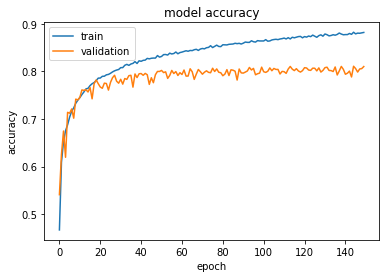

In [35]:
import keras
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()